In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [18]:
planets = sns.load_dataset('planets')

In [19]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [20]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [21]:
planets.describe(include='all')

,method,number,orbital_period,mass,distance,year
count,1035,1035.000000,992.000000,513.000000,808.000000,1035.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,NaN,1.240976,26014.728304,3.818617,733.116493,3.972567
min,NaN,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,NaN,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,NaN,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,NaN,2.000000,526.005000,3.040000,178.500000,2012.000000


In [22]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [23]:
z = pd.get_dummies(planets['method'], drop_first = True)

In [24]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [38]:
X = pd.concat([z, planets.iloc[:, 1:]], axis=1)

In [52]:
X = X.iloc[:,:-2]

In [54]:
X = pd.concat([X,planets['year']], axis =1)

In [64]:
X = X.dropna()

In [65]:
y = planets.iloc[:,-2]

In [66]:
y

0        77.40
1        56.95
2        19.84
3       110.62
4       119.47
         ...  
1030    172.00
1031    148.00
1032    174.00
1033    293.00
1034    260.00
Name: distance, Length: 1035, dtype: float64

In [67]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

In [50]:
X_original = scaler.inverse_transform(X_scaled)

In [51]:
X_original

array([[   0.  ,    0.  ,    0.  , ...,    7.1 ,   77.4 , 2006.  ],
       [   0.  ,    0.  ,    0.  , ...,    2.21,   56.95, 2008.  ],
       [   0.  ,    0.  ,    0.  , ...,    2.6 ,   19.84, 2011.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,     nan,  174.  , 2007.  ],
       [   0.  ,    0.  ,    0.  , ...,     nan,  293.  , 2008.  ],
       [   0.  ,    0.  ,    0.  , ...,     nan,  260.  , 2008.  ]])

In [69]:
%%time

from sklearn.cluster import KMeans

# Initialize the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit KMeans to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

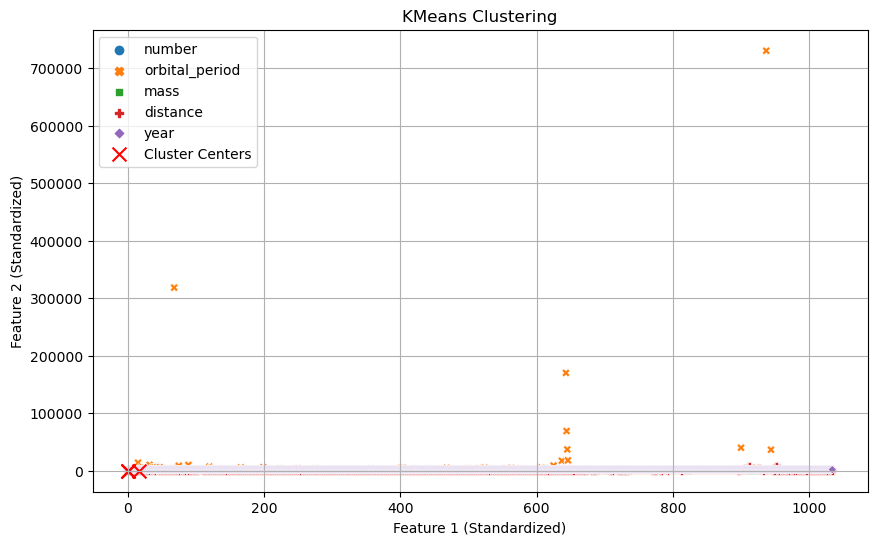

In [74]:
import seaborn as sns

# Create a DataFrame containing the scaled data and the cluster labels
data = pd.DataFrame(X_scaled, columns=X.columns)
data['Cluster'] = cluster_labels

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=planets)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers', s=100)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()